In [1]:
import pandas as pd
merged_cars =pd.read_csv(r'merged_data.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_10444\3211184951.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_cars =pd.read_csv(r'merged_data.csv')


In [2]:
merged_cars.head(2)

,car_links,City,it,ft,bt,km,transmission,ownerNo,owner,oem,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN


Remove commas from the 'km' column

In [3]:
merged_cars['km']

0       1,20,000
1         32,706
2         11,949
3         17,794
4         60,000
          ...   
8364      10,000
8365    1,20,000
8366      50,000
8367      40,000
8368    1,20,000
Name: km, Length: 8369, dtype: object

In [4]:
# Remove commas from the 'km' column
merged_cars['km'] = merged_cars['km'].str.replace(',', '', regex=False)

In [5]:
# Convert the 'km' column from float to integer
merged_cars['km'] = merged_cars['km'].astype(int)

Extract only the digits from the 'owner' column

In [ ]:
merged_cars['owner']

0       3rd Owner
1       2nd Owner
2       1st Owner
3       1st Owner
4       1st Owner
          ...    
8364    1st Owner
8365    1st Owner
8366    3rd Owner
8367    1st Owner
8368    2nd Owner
Name: owner, Length: 8369, dtype: object

In [7]:
# Extract only the digits from the 'owner' column
merged_cars['owner'] = merged_cars['owner'].str.extract('(\d+)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_10444\2918428017.py:2: SyntaxWarning: invalid escape sequence '\d'
  merged_cars['owner'] = merged_cars['owner'].str.extract('(\d+)')


In [8]:
merged_cars['owner'] = merged_cars['owner'].astype(int)
merged_cars['owner']

0       3
1       2
2       1
3       1
4       1
       ..
8364    1
8365    1
8366    3
8367    1
8368    2
Name: owner, Length: 8369, dtype: int64

In [9]:
# Get unique values from the 'owner' column
unique_owners = merged_cars['owner'].unique()

# Display the unique values
print(unique_owners)

[3 2 1 4 5 0]


In [10]:
merged_cars['price']

0          ₹ 4 Lakh
1       ₹ 8.11 Lakh
2       ₹ 5.85 Lakh
3       ₹ 4.62 Lakh
4       ₹ 7.90 Lakh
           ...     
8364    ₹ 5.10 Lakh
8365    ₹ 1.80 Lakh
8366    ₹ 5.50 Lakh
8367    ₹ 1.40 Lakh
8368       ₹ 5 Lakh
Name: price, Length: 8369, dtype: object

In [11]:
# Get unique values from the 'price' column
unique_price = merged_cars['price'].unique()

# Display the unique values
print(unique_price)

['₹ 4 Lakh' '₹ 8.11 Lakh' '₹ 5.85 Lakh' ... '₹ 1.58 Lakh' '₹ 35,000 '
 '₹ 10.82 Lakh']


In [12]:
merged_cars['price']

0          ₹ 4 Lakh
1       ₹ 8.11 Lakh
2       ₹ 5.85 Lakh
3       ₹ 4.62 Lakh
4       ₹ 7.90 Lakh
           ...     
8364    ₹ 5.10 Lakh
8365    ₹ 1.80 Lakh
8366    ₹ 5.50 Lakh
8367    ₹ 1.40 Lakh
8368       ₹ 5 Lakh
Name: price, Length: 8369, dtype: object

Function to convert price to numerical values

In [13]:
merged_cars['priceActual']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8364    NaN
8365    NaN
8366    NaN
8367    NaN
8368    NaN
Name: priceActual, Length: 8369, dtype: object

In [14]:
# Function to convert price to numerical values
def convert_priceActual(priceActual):
    # Check if the input is a string
    if isinstance(priceActual, str):
        # Remove the currency symbol and whitespace
        priceActual = priceActual.replace('₹', '').strip()
        
        # Remove any commas
        priceActual = priceActual.replace(',', '')
        
        # Check for 'Lakh', 'Crore', or 'Thousand' and convert accordingly
        if 'Lakh' in priceActual:
            return float(priceActual.replace(' Lakh', '').strip()) * 100000
        elif 'Crore' in priceActual:
            return float(priceActual.replace(' Crore', '').strip()) * 10000000
        elif 'Thousand' in priceActual:
            return float(priceActual.replace(' Thousand', '').strip()) * 1000
        else:
            return float(priceActual)  # In case there are values not using these terms
    else:
        return priceActual  # Return as is if it's not a string (e.g., float or None)

# Apply the conversion function to the price column
merged_cars['priceActual'] = merged_cars['priceActual'].apply(convert_priceActual)

Checking the Unique Values

In [15]:
# Get unique values from the 'priceActual' column
unique_price = merged_cars['priceActual'].unique()

# Display the unique values
print(unique_price)

[     nan  585000.  821000.  411000.  699000.  420000.  436000.  460000.
  463000.  581000.  515000.  593000.  780000.  415000.  278000.  458000.
  455000.  690000.  574000.  657000.  714000.  615000.  565000.  693000.
  549000.  688000.  692000.  545000.  569000.  561000.  566000.  601000.
  616000.  605000.  731000.  526000.  653000.  831000.  668000.  600000.
 1183000.  434000.  985000. 1036000.  852000.  367000.  606000.  476000.
  769000.  534000.  418000. 1488000.  487000.  491000.  945000.  689000.
  685000.  691000.  533000.  451000.  477000.  449000.  537000.  680000.
  721000.  459000.  564000.  528000.  510000.  514000.  546000.  478000.
  686000.  659000.  405000.  532000.  496000.  573000.  641000.  517000.
  650000.  590000.  760000.  701000.  504000.  586000.  538000.  341000.
 1448000.  670000.  619000.  624000.  665000.  637000.  741000.  622000.
  706000.  584000.  656000.  597000.  542000. 1012000.  842000.  416000.
  749000.  708000.  812000.  575000.  595000.  6290

Function to convert registration year to integer

In [16]:
merged_cars['Registration Year']

0            2015
1        Feb 2018
2       Sept 2018
3        Dec 2014
4            2015
          ...    
8364         2022
8365         2014
8366         2011
8367         2012
8368         2017
Name: Registration Year, Length: 8369, dtype: object

In [17]:
# Function to convert registration year to integer
def convert_registration_year(year):
    # Check if the input is NaN
    if pd.isna(year):
        return None  # Return None for NaN values
    # Check if the input is a string
    elif isinstance(year, str):
        # Split the string and take the last part (which should be the year)
        year_parts = year.split()
        return int(year_parts[-1])  # Convert the last part to an integer
    # Handle cases where year is already a number
    elif isinstance(year, (int, float)):
        return int(year)  # Convert float to int
    return None  # Return None for non-string and non-numeric values

# Apply the conversion function to the 'Registration Year' column
merged_cars['Registration Year'] = merged_cars['Registration Year'].apply(convert_registration_year)
merged_cars['Registration Year']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Registration Year, Length: 8369, dtype: float64

In [18]:
merged_cars['Registration Year']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Registration Year, Length: 8369, dtype: float64

In [19]:
merged_cars['Seats']

0       5 Seats
1       5 Seats
2       5 Seats
3       5 Seats
4       5 Seats
         ...   
8364    5 Seats
8365    5 Seats
8366    5 Seats
8367    5 Seats
8368    5 Seats
Name: Seats, Length: 8369, dtype: object

In [20]:
merged_cars.columns


Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo',
       'owner', 'oem', 'model', 'modelYear', 'centralVariantId', 'variantName',
       'price', 'priceActual', 'trendingText.imgUrl', 'trendingText.desc',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Registration Year.1', 'Insurance Validity.1',
       'Fuel Type.1', 'Seats.1', 'Kms Driven.1', 'RTO.1', 'Ownership.1',
       'Engine Displacement.1', 'Transmission.1', 'Year of Manufacture.1',
       'top', 'Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats.2', 'Color',
       'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Length', 'Wi

In [21]:
merged_cars['km']

0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     10000
8365    120000
8366     50000
8367     40000
8368    120000
Name: km, Length: 8369, dtype: int64

In [22]:
# Remove the substring " Kms"
#merged_cars['Kms Driven'] = merged_cars['Kms Driven'].str.replace(' Kms', '', regex=False)

# Remove commas and convert to numeric, handling NaN values
#merged_cars['Kms Driven'] = pd.to_numeric(merged_cars['Kms Driven'].str.replace(',', '', regex=False), errors='coerce')
#merged_cars['Kms Driven']

In [23]:
#merged_cars['Kms Driven']

In [24]:
# Drop the 'Ownership' column from the DataFrame
merged_cars = merged_cars.drop(columns=['Ownership'])

In [25]:
merged_cars['Engine Displacement']

0        998 cc
1       1497 cc
2       1199 cc
3       1197 cc
4       1248 cc
         ...   
8364     998 cc
8365     796 cc
8366    1796 cc
8367    1197 cc
8368    1461 cc
Name: Engine Displacement, Length: 8369, dtype: object

In [26]:
# Remove the substring " cc"
merged_cars['Engine Displacement'] = merged_cars['Engine Displacement'].str.replace(' cc', '', regex=False)

# Convert to numeric, handling NaN values
merged_cars['Engine Displacement'] = pd.to_numeric(merged_cars['Engine Displacement'], errors='coerce')
merged_cars['Engine Displacement']

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
8364     998.0
8365     796.0
8366    1796.0
8367    1197.0
8368    1461.0
Name: Engine Displacement, Length: 8369, dtype: float64

In [27]:
merged_cars['Engine Displacement']

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
8364     998.0
8365     796.0
8366    1796.0
8367    1197.0
8368    1461.0
Name: Engine Displacement, Length: 8369, dtype: float64

In [28]:
merged_cars['Year of Manufacture']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Year of Manufacture, Length: 8369, dtype: float64

In [29]:
# Fill NaN values with a specific value (e.g., 0 or the mean year)
merged_cars['Year of Manufacture'].fillna(0, inplace=True)  # or use merged_cars['Year of Manufacture'].fillna(merged_cars['Year of Manufacture'].mean(), inplace=True)

# Convert the 'Year of Manufacture' column from float to integer
merged_cars['Year of Manufacture'] = merged_cars['Year of Manufacture'].astype(int)
merged_cars['Year of Manufacture']

0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Year of Manufacture, Length: 8369, dtype: int64

In [30]:
columns_to_drop = ['Registration Year.1', 'Fuel Type.1', 'Seats.1', 'trendingText.imgUrl', 
                   'trendingText.desc', 'Ground Clearance Unladen', 'Seating Capacity', 
                   'BoreX Stroke', 'Kms Driven.1', 'RTO.1', 'Engine Displacement.1', 
                   'Transmission.1', 'Year of Manufacture.1']

merged_cars.drop(columns=columns_to_drop, inplace=True)

In [31]:
merged_cars.head(2)

,car_links,City,it,ft,bt,km,transmission,ownerNo,owner,oem,...,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size
0,https://www.cardekho.com/used-car-details/used...,bangalore,0,Petrol,Hatchback,120000,Manual,3,3,Maruti,...,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,bangalore,0,Petrol,SUV,32706,Manual,2,2,Ford,...,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16


In [32]:
merged_cars['Registration Year']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Registration Year, Length: 8369, dtype: float64

In [33]:
# Ensure the 'Alloy Wheel Size' column is treated as strings
merged_cars['Alloy Wheel Size'] = merged_cars['Alloy Wheel Size'].astype(str)

# Remove any non-numeric characters, if applicable (e.g., 'N/A', or any other characters)
# Here, we will keep only numeric characters
merged_cars['Alloy Wheel Size'] = merged_cars['Alloy Wheel Size'].str.replace(r'[^0-9]', '', regex=True)

# Strip any leading or trailing whitespace
merged_cars['Alloy Wheel Size'] = merged_cars['Alloy Wheel Size'].str.strip()

# Convert the column to numeric, coercing errors to NaN
merged_cars['Alloy Wheel Size'] = pd.to_numeric(merged_cars['Alloy Wheel Size'], errors='coerce')

# Convert to integer type using 'Int64' for nullable integers
merged_cars['Alloy Wheel Size'] = merged_cars['Alloy Wheel Size'].astype('Int64')

In [34]:
merged_cars['Alloy Wheel Size']

0       <NA>
1         16
2         14
3         14
4         16
        ... 
8364    <NA>
8365    <NA>
8366      17
8367      14
8368      16
Name: Alloy Wheel Size, Length: 8369, dtype: Int64

In [35]:
# Ensure the 'Wheel Size' column is treated as strings
merged_cars['Wheel Size'] = merged_cars['Wheel Size'].astype(str)

# Remove any non-numeric characters, if applicable (e.g., 'N/A', or any other characters)
# Here, we will keep only numeric characters and dots (for floats) if necessary
merged_cars['Wheel Size'] = merged_cars['Wheel Size'].str.replace(r'[^0-9]', '', regex=True)

# Strip any leading or trailing whitespace
merged_cars['Wheel Size'] = merged_cars['Wheel Size'].str.strip()

# Convert the column to numeric, coercing errors to NaN
merged_cars['Wheel Size'] = pd.to_numeric(merged_cars['Wheel Size'], errors='coerce')

# Convert to integer type using 'Int64' for nullable integers
merged_cars['Wheel Size'] = merged_cars['Wheel Size'].astype('Int64')

In [36]:
merged_cars['Wheel Size']

0       <NA>
1         16
2         14
3         14
4         16
        ... 
8364    <NA>
8365    <NA>
8366      17
8367      14
8368      16
Name: Wheel Size, Length: 8369, dtype: Int64

In [37]:
# Ensure the 'Cargo Volumn' column is treated as strings
merged_cars['Cargo Volumn'] = merged_cars['Cargo Volumn'].astype(str)

# Remove the substrings '-litres' and '-liters' from the 'Cargo Volumn' column
merged_cars['Cargo Volumn'] = merged_cars['Cargo Volumn'].str.replace('-litres', '', case=False, regex=False)
merged_cars['Cargo Volumn'] = merged_cars['Cargo Volumn'].str.replace('-liters', '', case=False, regex=False)

# Strip any leading or trailing whitespace
merged_cars['Cargo Volumn'] = merged_cars['Cargo Volumn'].str.strip()

# Convert the column to numeric, coercing errors to NaN
merged_cars['Cargo Volumn'] = pd.to_numeric(merged_cars['Cargo Volumn'], errors='coerce')

# Convert to integer type using 'Int64' for nullable integers
merged_cars['Cargo Volumn'] = merged_cars['Cargo Volumn'].astype('Int64')

In [38]:
merged_cars['Cargo Volumn']

0       235
1       352
2       242
3       407
4       353
       ... 
8364    313
8365    177
8366    475
8367    236
8368    410
Name: Cargo Volumn, Length: 8369, dtype: Int64

In [39]:
# Convert the float column to integer type using 'Int64' for nullable integers
merged_cars['No Door Numbers'] = merged_cars['No Door Numbers'].astype('Int64')


In [40]:
merged_cars['No Door Numbers']

0       5
1       4
2       5
3       4
4       5
       ..
8364    5
8365    5
8366    4
8367    5
8368    5
Name: No Door Numbers, Length: 8369, dtype: Int64

In [41]:
# Ensure the 'Acceleration' column is treated as strings
merged_cars['Acceleration'] = merged_cars['Acceleration'].astype(str)

# Remove the substring 'Seconds' (case-insensitive) from the 'Acceleration' column
merged_cars['Acceleration'] = merged_cars['Acceleration'].str.replace('Seconds', '', case=False, regex=False)

# Strip any leading or trailing whitespace
merged_cars['Acceleration'] = merged_cars['Acceleration'].str.strip()

# Convert the column to float, coercing errors to NaN
merged_cars['Acceleration'] = pd.to_numeric(merged_cars['Acceleration'], errors='coerce')

In [42]:
merged_cars['Top Speed']

0       150 Kmph
1            NaN
2       150 kmph
3       172km/hr
4       190 Kmph
          ...   
8364         NaN
8365    140 kmph
8366    230km/hr
8367    156 Kmph
8368    168 Kmph
Name: Top Speed, Length: 8369, dtype: object

In [43]:
# Ensure the 'Turning Radius' column is treated as strings
merged_cars['Turning Radius'] = merged_cars['Turning Radius'].astype(str)

# Remove the substrings 'metres' and 'meters' (case-insensitive) from the 'Turning Radius' column
merged_cars['Turning Radius'] = merged_cars['Turning Radius'].str.replace('metres', '', case=False, regex=False)
merged_cars['Turning Radius'] = merged_cars['Turning Radius'].str.replace('meters', '', case=False, regex=False)

# Strip any leading or trailing whitespace
merged_cars['Turning Radius'] = merged_cars['Turning Radius'].str.strip()

# Convert the column to float, coercing errors to NaN
merged_cars['Turning Radius'] = pd.to_numeric(merged_cars['Turning Radius'], errors='coerce')

In [44]:
merged_cars['Turning Radius']

0       4.70
1       5.30
2       4.90
3       4.70
4       5.20
        ... 
8364     NaN
8365    4.60
8366    5.42
8367    4.70
8368    5.20
Name: Turning Radius, Length: 8369, dtype: float64

In [45]:
# Ensure the 'Gear Box' column is treated as strings
merged_cars['Gear Box'] = merged_cars['Gear Box'].astype(str)

# Remove the substrings 'speed' and '-speed' (case-insensitive) from the 'Gear Box' column
merged_cars['Gear Box'] = merged_cars['Gear Box'].str.replace('[-]?speed', '', case=False, regex=True)

# Strip any leading or trailing whitespace
merged_cars['Gear Box'] = merged_cars['Gear Box'].str.strip()

# Optional: If you want to handle empty strings or NaN values, you can use:
merged_cars['Gear Box'] = merged_cars['Gear Box'].replace('', pd.NA)

In [46]:
merged_cars['Gear Box']

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    7
8367    5
8368    6
Name: Gear Box, Length: 8369, dtype: object

In [47]:
# Ensure the 'Gross Weight' column is treated as strings
merged_cars['Gross Weight'] = merged_cars['Gross Weight'].astype(str)

# Remove the substring 'kg' (case-insensitive) from the 'Gross Weight' column
merged_cars['Gross Weight'] = merged_cars['Gross Weight'].str.replace('kg', '', case=False, regex=False)

# Strip any leading or trailing whitespace
merged_cars['Gross Weight'] = merged_cars['Gross Weight'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Gross Weight'] = pd.to_numeric(merged_cars['Gross Weight'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Gross Weight'] = merged_cars['Gross Weight'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Gross Weight'])

In [48]:
merged_cars['Gross Weight']

0       1250
1       1660
2          0
3          0
4       1670
        ... 
8364    1260
8365    1185
8366    2020
8367    1430
8368    1889
Name: Gross Weight, Length: 8369, dtype: Int64

In [49]:
# Ensure the 'Kerb Weight' column is treated as strings
merged_cars['Kerb Weight'] = merged_cars['Kerb Weight'].astype(str)

# Remove the substring 'kg' (case-insensitive) from the 'Kerb Weight' column
merged_cars['Kerb Weight'] = merged_cars['Kerb Weight'].str.replace('kg', '', case=False, regex=False)

# Strip any leading or trailing whitespace
merged_cars['Kerb Weight'] = merged_cars['Kerb Weight'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Kerb Weight'] = pd.to_numeric(merged_cars['Kerb Weight'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Kerb Weight'] = merged_cars['Kerb Weight'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Kerb Weight'])

In [50]:
merged_cars['Kerb Weight']

0        835
1       1242
2       1012
3       1180
4       1230
        ... 
8364     810
8365     720
8366    1585
8367    1030
8368    1350
Name: Kerb Weight, Length: 8369, dtype: Int64

In [51]:
# Remove the substring 'mm' from the 'Rear Tread' column
merged_cars['Rear Tread'] = merged_cars['Rear Tread'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Rear Tread'] = merged_cars['Rear Tread'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Rear Tread'] = pd.to_numeric(merged_cars['Rear Tread'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Rear Tread'] = merged_cars['Rear Tread'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Rear Tread'])

In [52]:
merged_cars['Rear Tread']

0       1410
1          0
2       1420
3       1493
4          0
        ... 
8364    1440
8365    1290
8366    1552
8367    1480
8368    1567
Name: Rear Tread, Length: 8369, dtype: Int64

In [53]:
# Remove the substring 'mm' from the 'Front Tread' column
merged_cars['Front Tread'] = merged_cars['Front Tread'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Front Tread'] = merged_cars['Front Tread'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Front Tread'] = pd.to_numeric(merged_cars['Front Tread'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Front Tread'] = merged_cars['Front Tread'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Front Tread'])

In [54]:
merged_cars['Front Tread']

0       1420
1          0
2       1400
3       1479
4          0
        ... 
8364    1430
8365    1295
8366    1549
8367    1470
8368    1560
Name: Front Tread, Length: 8369, dtype: Int64

In [55]:
# Remove the substring 'mm' from the 'Wheel Base' column
merged_cars['Wheel Base'] = merged_cars['Wheel Base'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Wheel Base'] = merged_cars['Wheel Base'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Wheel Base'] = pd.to_numeric(merged_cars['Wheel Base'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Wheel Base'] = merged_cars['Wheel Base'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Wheel Base'])

In [56]:
merged_cars['Wheel Base']

0       2425
1       2519
2       2400
3       2425
4       2600
        ... 
8364    2435
8365    2360
8366    2760
8367    2360
8368    2673
Name: Wheel Base, Length: 8369, dtype: Int64

In [57]:
# Remove the substring 'mm' from the 'Height' column
merged_cars['Height'] = merged_cars['Height'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Height'] = merged_cars['Height'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Height'] = pd.to_numeric(merged_cars['Height'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Height'] = merged_cars['Height'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Height'])

In [58]:
merged_cars['Height']

0       1565
1       1647
2       1535
3       1520
4       1595
        ... 
8364    1555
8365    1475
8366    1447
8367    1620
8368    1695
Name: Height, Length: 8369, dtype: Int64

In [59]:
# Remove the substring 'mm' from the 'Width' column
merged_cars['Width'] = merged_cars['Width'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Width'] = merged_cars['Width'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Width'] = pd.to_numeric(merged_cars['Width'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Width'] = merged_cars['Width'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Width'])

In [60]:
merged_cars['Width']

0       1635
1       1765
2       1647
3       1660
4       1785
        ... 
8364    1655
8365    1490
8366    1770
8367    1680
8368    1822
Name: Width, Length: 8369, dtype: Int64

In [61]:
# Remove the substring 'mm' from the 'Length' column
merged_cars['Length'] = merged_cars['Length'].str.replace('mm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Length'] = merged_cars['Length'].str.strip()

# Convert the column to integer, coercing errors to NaN
merged_cars['Length'] = pd.to_numeric(merged_cars['Length'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integers

# Optional: Handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Length'] = merged_cars['Length'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Length'])

In [62]:
merged_cars['Length']

0       3715
1       3998
2       3746
3       3995
4       4300
        ... 
8364    3695
8365    3395
8366    4591
8367    3775
8368    4315
Name: Length, Length: 8369, dtype: Int64

In [63]:
# Remove the substring 'Nm' from the 'Torque' column
merged_cars['Torque'] = merged_cars['Torque'].str.replace('Nm', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Torque'] = merged_cars['Torque'].str.strip()

# Convert the column to float, coercing errors to NaN
merged_cars['Torque'] = pd.to_numeric(merged_cars['Torque'], errors='coerce')

# Optionally, handle NaN values if needed
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Torque'] = merged_cars['Torque'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Torque'])

In [64]:
merged_cars['Torque']

0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
         ...  
8364     89.00
8365     69.00
8366    285.00
8367    114.00
8368    245.00
Name: Torque, Length: 8369, dtype: float64

In [65]:
merged_cars['Engine']

0        998 CC
1       1497 CC
2       1199 CC
3       1197 CC
4       1248 CC
         ...   
8364     998 CC
8365     796 CC
8366    1796 CC
8367    1197 CC
8368    1461 CC
Name: Engine, Length: 8369, dtype: object

In [66]:
# Drop the 'Engine' column from the DataFrame
merged_cars = merged_cars.drop(columns=['Engine'])

In [67]:
# Remove unwanted substrings and any whitespace
merged_cars['Mileage'] = merged_cars['Mileage'].str.replace(' kmpl', '', regex=False)
merged_cars['Mileage'] = merged_cars['Mileage'].str.replace(' km/kg', '', regex=False)

# Strip any leading or trailing whitespace
merged_cars['Mileage'] = merged_cars['Mileage'].str.strip()

# Convert the column to float, coercing errors to NaN
merged_cars['Mileage'] = pd.to_numeric(merged_cars['Mileage'], errors='coerce')

# Optionally, fill NaN values or drop them
# For example, you can fill NaN with a default value (e.g., 0)
merged_cars['Mileage'] = merged_cars['Mileage'].fillna(0)

# Or drop rows with NaN values
# merged_cars = merged_cars.dropna(subset=['Mileage'])

In [68]:
merged_cars['Mileage']

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64

In [69]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo',
       'owner', 'oem', 'model', 'modelYear', 'centralVariantId', 'variantName',
       'price', 'priceActual', 'Registration Year', 'Insurance Validity',
       'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'Insurance Validity.1',
       'Ownership.1', 'top', 'Comfort', 'Interior', 'Exterior', 'Safety',
       'Entertainment', 'Mileage', 'Max Power', 'Torque', 'Seats.2', 'Color',
       'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre 

In [70]:
merged_cars['Seats']

0       5 Seats
1       5 Seats
2       5 Seats
3       5 Seats
4       5 Seats
         ...   
8364    5 Seats
8365    5 Seats
8366    5 Seats
8367    5 Seats
8368    5 Seats
Name: Seats, Length: 8369, dtype: object

In [71]:
# Remove the substring ' Seats' from the 'Seats' column
merged_cars['Seats'] = merged_cars['Seats'].str.replace(' Seats', '', regex=False)

# Convert to numeric, coercing errors to NaN
merged_cars['Seats'] = pd.to_numeric(merged_cars['Seats'], errors='coerce')

# Optionally, fill NaN values with a default value (e.g., 0) or drop them
# Example: Fill NaN with 0
merged_cars['Seats'] = merged_cars['Seats'].fillna(0).astype(int)

# OR, if you want to drop rows with NaN values
#merged_cars = merged_cars.dropna(subset=['Seats'])

In [72]:
merged_cars['Seats']

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    5
8367    5
8368    5
Name: Seats, Length: 8369, dtype: int64

In [73]:
# Assuming merged_cars is your DataFrame
merged_cars['priceActual'] = pd.to_numeric(merged_cars['priceActual'], errors='coerce')

In [74]:
merged_cars['priceActual']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8364   NaN
8365   NaN
8366   NaN
8367   NaN
8368   NaN
Name: priceActual, Length: 8369, dtype: float64

In [75]:
# Convert 'modelYear' from object to integer
merged_cars['modelYear'] = merged_cars['modelYear'].astype(int)

In [76]:
# Convert 'centralVariantId' from object to integer
merged_cars['centralVariantId'] = merged_cars['centralVariantId'].astype(int)

In [77]:
# Drop the column 'Ownership.1'
merged_cars = merged_cars.drop(columns=['Ownership.1'])

In [78]:
# Drop the column 'ownerNo'
merged_cars = merged_cars.drop(columns=['ownerNo'])

In [79]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Kms Driven', 'RTO', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Insurance Validity.1', 'top', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Mileage',
       'Max Power', 'Torque', 'Seats.2', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 

In [80]:
merged_cars.head(2)

,car_links,City,it,ft,bt,km,transmission,owner,oem,model,...,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size
0,https://www.cardekho.com/used-car-details/used...,bangalore,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,...,4.7,Ventilated Disc,Drum,150 Kmph,15.05,"Tubeless, Radial",5,235,<NA>,<NA>
1,https://www.cardekho.com/buy-used-car-details/...,bangalore,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,...,5.3,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352,16,16


In [81]:
merged_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_links             8369 non-null   object 
 1   City                  8369 non-null   object 
 2   it                    8369 non-null   int64  
 3   ft                    8369 non-null   object 
 4   bt                    8365 non-null   object 
 5   km                    8369 non-null   int64  
 6   transmission          8369 non-null   object 
 7   owner                 8369 non-null   int64  
 8   oem                   8369 non-null   object 
 9   model                 8369 non-null   object 
 10  modelYear             8369 non-null   int64  
 11  centralVariantId      8369 non-null   int64  
 12  variantName           8369 non-null   object 
 13  price                 8369 non-null   object 
 14  priceActual           1670 non-null   float64
 15  Registration Year    

In [82]:
merged_cars.isnull().sum()

car_links              0
City                   0
it                     0
ft                     0
bt                     4
                    ... 
Tyre Type             77
No Door Numbers       11
Cargo Volumn        2420
Wheel Size          2983
Alloy Wheel Size    2983
Length: 67, dtype: int64

In [83]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Kms Driven', 'RTO', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Insurance Validity.1', 'top', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Mileage',
       'Max Power', 'Torque', 'Seats.2', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 

In [84]:
# Fill NaN values with a specific year, e.g., 0 or any other year
merged_cars['Registration Year'] = merged_cars['Registration Year'].fillna(0).astype(int)

In [85]:
merged_cars['Registration Year']

0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Registration Year, Length: 8369, dtype: int64

In [86]:
merged_cars['price']

0          ₹ 4 Lakh
1       ₹ 8.11 Lakh
2       ₹ 5.85 Lakh
3       ₹ 4.62 Lakh
4       ₹ 7.90 Lakh
           ...     
8364    ₹ 5.10 Lakh
8365    ₹ 1.80 Lakh
8366    ₹ 5.50 Lakh
8367    ₹ 1.40 Lakh
8368       ₹ 5 Lakh
Name: price, Length: 8369, dtype: object

In [87]:
# Function to convert price to numerical values
def convert_price(price_str):
    # Remove the currency symbol and spaces
    price_str = price_str.replace('₹', '').strip()
    
    # Initialize multiplier
    multiplier = 1
    
    # Check for units and set multiplier accordingly
    if 'Crore' in price_str:
        multiplier = 10000000  # 1 Crore = 10 million
        price_str = price_str.replace('Crore', '').strip()
    elif 'Lakh' in price_str:
        multiplier = 100000  # 1 Lakh = 100 thousand
        price_str = price_str.replace('Lakh', '').strip()
    elif 'Thousand' in price_str:
        multiplier = 1000  # 1 Thousand = 1000
        price_str = price_str.replace('Thousand', '').strip()
    
    # Remove commas and convert to float, then apply multiplier
    price_str = price_str.replace(',', '')  # Remove commas
    return float(price_str) * multiplier

# Apply the function to the 'price' column
merged_cars['price'] = merged_cars['price'].apply(convert_price)

# Display the converted prices
print(merged_cars['price'])

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8369, dtype: float64


In [88]:
merged_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_links             8369 non-null   object 
 1   City                  8369 non-null   object 
 2   it                    8369 non-null   int64  
 3   ft                    8369 non-null   object 
 4   bt                    8365 non-null   object 
 5   km                    8369 non-null   int64  
 6   transmission          8369 non-null   object 
 7   owner                 8369 non-null   int64  
 8   oem                   8369 non-null   object 
 9   model                 8369 non-null   object 
 10  modelYear             8369 non-null   int64  
 11  centralVariantId      8369 non-null   int64  
 12  variantName           8369 non-null   object 
 13  price                 8369 non-null   float64
 14  priceActual           1670 non-null   float64
 15  Registration Year    

In [89]:
# Drop the 'Year of Manufacture' column
merged_cars = merged_cars.drop(columns=['Year of Manufacture'])

In [90]:
# Drop the 'Insurance Validity.1' column
merged_cars = merged_cars.drop(columns=['Insurance Validity.1'])

In [91]:
# Drop the 'Seats.2' column
merged_cars = merged_cars.drop(columns=['Seats.2'])

In [92]:
# Drop the 'Kms Driven' column
merged_cars = merged_cars.drop(columns=['Kms Driven'])

In [93]:
# Drop the 'Transmission' column
merged_cars = merged_cars.drop(columns=['Transmission'])

In [94]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'RTO', 'Engine Displacement', 'top', 'Comfort', 'Interior',
       'Exterior', 'Safety', 'Entertainment', 'Mileage', 'Max Power', 'Torque',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size'],
      dtype='object')

In [95]:
merged_cars.head(2)

,car_links,City,it,ft,bt,km,transmission,owner,oem,model,...,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size
0,https://www.cardekho.com/used-car-details/used...,bangalore,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,...,4.7,Ventilated Disc,Drum,150 Kmph,15.05,"Tubeless, Radial",5,235,<NA>,<NA>
1,https://www.cardekho.com/buy-used-car-details/...,bangalore,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,...,5.3,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352,16,16


C:\Users\USER\AppData\Local\Temp\ipykernel_10444\2531596678.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Missing Values', data=missing_values_df, palette='viridis')


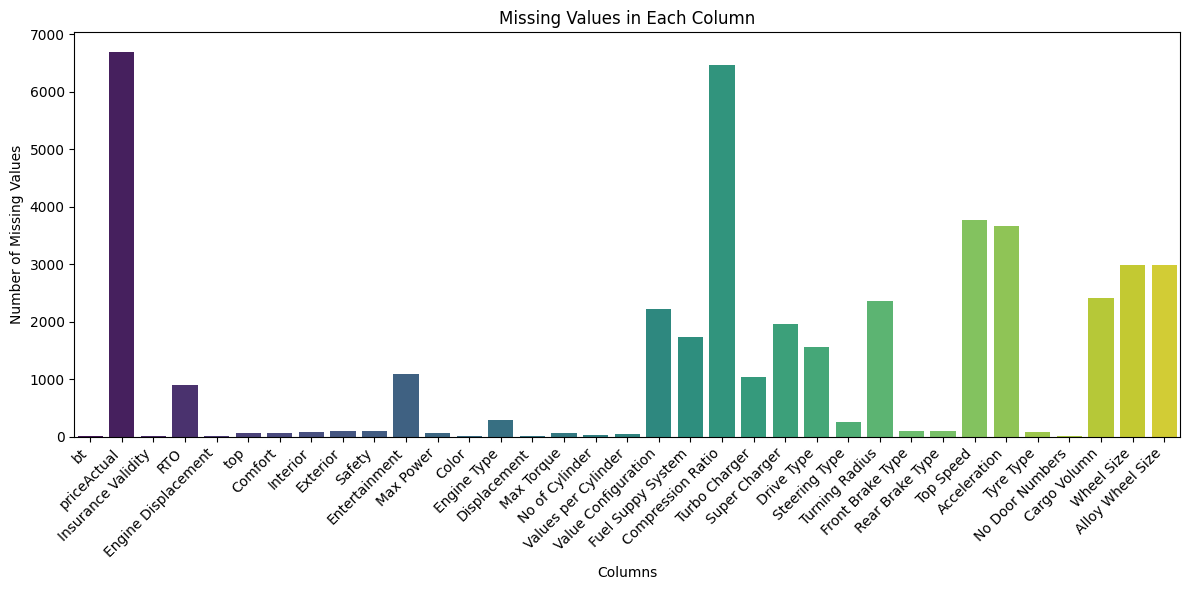

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values for each column
missing_values = merged_cars.isnull().sum()

# Create a DataFrame for visualization
missing_values_df = missing_values[missing_values > 0].reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a vertical bar plot
sns.barplot(x='Column', y='Missing Values', data=missing_values_df, palette='viridis')

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

In [97]:
merged_cars['bt'].isnull().sum()

np.int64(4)

In [98]:
# Assuming merged_cars is already defined and is a pandas DataFrame
missing_values = merged_cars['bt'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8364    False
8365    False
8366    False
8367    False
8368    False
Name: bt, Length: 8369, dtype: bool

In [99]:
# Fill missing values with the mode of the 'bt' column
merged_cars['bt'].fillna(merged_cars['bt'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = merged_cars['bt'].isnull().sum()
print(f"Missing values after filling: {missing_values_after}")

Missing values after filling: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_10444\1479809698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_cars['bt'].fillna(merged_cars['bt'].mode()[0], inplace=True)


In [100]:
merged_cars.isnull().sum()

car_links              0
City                   0
it                     0
ft                     0
bt                     0
                    ... 
Tyre Type             77
No Door Numbers       11
Cargo Volumn        2420
Wheel Size          2983
Alloy Wheel Size    2983
Length: 62, dtype: int64

In [101]:
merged_cars['price']

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8369, dtype: float64

In [102]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'RTO', 'Engine Displacement', 'top', 'Comfort', 'Interior',
       'Exterior', 'Safety', 'Entertainment', 'Mileage', 'Max Power', 'Torque',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size'],
      dtype='object')

In [103]:
merged_cars['Mileage']

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64

In [104]:
merged_cars['Max Torque']

0             90Nm@3500rpm
1            150Nm@4500rpm
2            114Nm@3500rpm
3         113.75Nm@4000rpm
4            200Nm@1750rpm
               ...        
8364          89Nm@3500rpm
8365          69Nm@3500rpm
8366    285Nm@2400-4000rpm
8367         114Nm@4000rpm
8368         245Nm@1750rpm
Name: Max Torque, Length: 8369, dtype: object

In [105]:
merged_cars['Max Torque']

0             90Nm@3500rpm
1            150Nm@4500rpm
2            114Nm@3500rpm
3         113.75Nm@4000rpm
4            200Nm@1750rpm
               ...        
8364          89Nm@3500rpm
8365          69Nm@3500rpm
8366    285Nm@2400-4000rpm
8367         114Nm@4000rpm
8368         245Nm@1750rpm
Name: Max Torque, Length: 8369, dtype: object

In [106]:
# Create the new columns by splitting the 'Max Torque' column
split_torque = merged_cars['Max Torque'].str.split('@', expand=True)

# Check if split_torque has two columns
if split_torque.shape[1] == 2:
    merged_cars[['Torque_Nm', 'Torque_rpm']] = split_torque
else:
    # Handle the case where the split does not yield two columns
    print("Warning: Some entries in 'Max Torque' do not conform to the expected format.")
    merged_cars[['Torque_Nm', 'Torque_rpm']] = split_torque.reindex(columns=[0, 1])

# Remove any whitespace from the new columns, if necessary
merged_cars['Torque_Nm'] = merged_cars['Torque_Nm'].str.strip()
merged_cars['Torque_rpm'] = merged_cars['Torque_rpm'].str.strip()

# Optionally, convert Torque_Nm to numeric (if needed)
merged_cars['Torque_Nm'] = pd.to_numeric(merged_cars['Torque_Nm'].str.replace('Nm', '', regex=False), errors='coerce')

# Display the updated DataFrame
print(merged_cars[['Max Torque', 'Torque_Nm', 'Torque_rpm']].head())

         Max Torque  Torque_Nm Torque_rpm
0      90Nm@3500rpm      90.00    3500rpm
1     150Nm@4500rpm     150.00    4500rpm
2     114Nm@3500rpm     114.00    3500rpm
3  113.75Nm@4000rpm     113.75    4000rpm
4     200Nm@1750rpm     200.00    1750rpm


In [107]:
merged_cars['Torque_Nm'].isnull().sum()

np.int64(832)

In [108]:
merged_cars['Torque_rpm'].isnull().sum()

np.int64(209)

In [109]:
merged_cars.isnull().sum()

car_links              0
City                   0
it                     0
ft                     0
bt                     0
                    ... 
Cargo Volumn        2420
Wheel Size          2983
Alloy Wheel Size    2983
Torque_Nm            832
Torque_rpm           209
Length: 64, dtype: int64

In [110]:
merged_cars['Max Power']

0        67.04bhp@6000rpm
1       121.31bhp@6500rpm
2           84bhp@6000rpm
3        81.86bhp@6000rpm
4         88.5bhp@4000rpm
              ...        
8364     65.71bhp@5500rpm
8365      47.3bhp@6000rpm
8366       186bhp@5600rpm
8367     85.80bhp@6000rpm
8368    108.45bhp@4000rpm
Name: Max Power, Length: 8369, dtype: object

In [111]:

# Remove 'rpm' from the 'Torque_rpm' column
merged_cars['Torque_rpm'] = merged_cars['Torque_rpm'].str.replace('rpm', '', regex=False)

# Optionally, you can also strip any whitespace if needed
merged_cars['Torque_rpm'] = merged_cars['Torque_rpm'].str.strip()

# Display the updated DataFrame
print(merged_cars[['Torque_rpm']].head())

  Torque_rpm
0       3500
1       4500
2       3500
3       4000
4       1750


In [112]:
# Drop the 'Torque' column
merged_cars = merged_cars.drop(columns=['Torque'])

In [113]:
# Drop the 'Torque' column
merged_cars = merged_cars.drop(columns=['Max Torque'])

In [114]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'RTO', 'Engine Displacement', 'top', 'Comfort', 'Interior',
       'Exterior', 'Safety', 'Entertainment', 'Mileage', 'Max Power', 'Color',
       'Engine Type', 'Displacement', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn',
       'Wheel Size', 'Alloy Wheel Size', 'Torque_Nm', 'Torque_rpm'],
      dtype='object')

In [115]:
merged_cars['City']

0       bangalore
1       bangalore
2       bangalore
3       bangalore
4       bangalore
          ...    
8364      kolkata
8365      kolkata
8366      kolkata
8367      kolkata
8368      kolkata
Name: City, Length: 8369, dtype: object

In [116]:
# Extract only integer values from the 'Top Speed' column
merged_cars['Top Speed'] = merged_cars['Top Speed'].str.extract(r'(\d+)')[0]

# Convert the extracted values to numeric, handling any errors (e.g., None values)
merged_cars['Top Speed'] = pd.to_numeric(merged_cars['Top Speed'], errors='coerce')

# Display the updated DataFrame to confirm the new column
print(merged_cars[['Top Speed']].head())

   Top Speed
0      150.0
1        NaN
2      150.0
3      172.0
4      190.0


In [117]:
# Use str.extract to get bhp and rpm and create new columns
merged_cars[['power_bhp', 'power_rpm']] = merged_cars['Max Power'].str.extract(r'(\d+\.?\d*)bhp@(\d+)rpm')

# Convert the extracted values to numeric types
merged_cars['power_bhp'] = pd.to_numeric(merged_cars['power_bhp'])
merged_cars['power_rpm'] = pd.to_numeric(merged_cars['power_rpm'])

# Display the updated DataFrame to confirm the new columns
print(merged_cars[['power_bhp', 'power_rpm']].head())

   power_bhp  power_rpm
0      67.04     6000.0
1     121.31     6500.0
2      84.00     6000.0
3      81.86     6000.0
4      88.50     4000.0


In [118]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'RTO', 'Engine Displacement', 'top', 'Comfort', 'Interior',
       'Exterior', 'Safety', 'Entertainment', 'Mileage', 'Max Power', 'Color',
       'Engine Type', 'Displacement', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn',
       'Wheel Size', 'Alloy Wheel Size', 'Torque_Nm', 'Torque_rpm',
       'power_bhp', 'power_rpm'],
      dt

In [119]:
# Drop the 'Max Power' column
merged_cars = merged_cars.drop(columns=['Max Power'])

In [120]:
merged_cars['Torque_rpm']

0            3500
1            4500
2            3500
3            4000
4            1750
          ...    
8364         3500
8365         3500
8366    2400-4000
8367         4000
8368         1750
Name: Torque_rpm, Length: 8369, dtype: object

In [121]:
# Step 1: Convert 'Torque_rpm' to numeric, coercing errors to NaN
merged_cars['Torque_rpm'] = pd.to_numeric(merged_cars['Torque_rpm'], errors='coerce')

# Step 2: Handle NaN values
# Option 1: Fill NaN with a specific value (e.g., 0)
# merged_cars['Torque_rpm'] = merged_cars['Torque_rpm'].fillna(0)

# Option 2: Drop rows with NaN values
#merged_cars = merged_cars.dropna(subset=['Torque_rpm'])
merged_cars['Torque_rpm']

0       3500.0
1       4500.0
2       3500.0
3       4000.0
4       1750.0
         ...  
8364    3500.0
8365    3500.0
8366       NaN
8367    4000.0
8368    1750.0
Name: Torque_rpm, Length: 8369, dtype: float64

In [122]:
# Display unique values from the 'Torque_rpm' column
unique_torque_values = merged_cars['Torque_rpm'].unique()

# Print the unique values
print(unique_torque_values)

[3500. 4500. 4000. 1750.   nan 4400. 4800. 4600. 3000. 4700. 1250. 4250.
 3200. 2000. 4200. 4850. 3750. 2250. 1900. 2200. 1600. 2500. 4300. 3800.
 3300. 2800. 1000. 2600. 1800. 4750. 4386. 1350. 5000. 1500. 1850. 1740.
 2700. 3100. 4100. 1400. 3400. 3600. 2400.]


In [123]:
# Display unique values from the 'priceActual' column
unique_prices = merged_cars['Gear Box'].unique()

# Print the unique values
print(unique_prices)

['5' '6' '7' '4' '8G-DCT' '9' '8' '8 Steptronic' '7 DCT' '8  Tiptronic'
 '6  IMT' '6 AutoSHIFT' '6 CVT' 'CVT' '7  DSG' '7  DCT'
 '8 Steptronic Sport Automatic Transmission' '7  CVT' 'Five  Manual'
 '5  CVT' 'nan' '6  AT' '6 iMT' '6 DCT' '7 S-Tronic'
 '7G DCT 7 Dual Clutch Transmission' '5`' '9  Tronic' '6 IVT'
 'Direct Drive' '6  IVT' 'IVT' '8  CVT' 'Five  Manual Transmission'
 '5  AT+ Paddle Shifters' 'iMT' 'AGS' '6 IMT' '6  MT' '6  iMT' 'Five'
 '6 AT' '9G-TRONIC' '9G-TRONIC automatic' '7 DSG' 'Six  Manual' '8  Sport'
 '6  with Sequential Shift' '7 Steptronic'
 'Five  Manual Transmission Gearbox' 'AMG SHIFT DCT 8G' 'AMG 7 DCT'
 'E-CVT' '7 Stronic' '8 Automatic Transmission'
 'Six  Manual with Paddle Shifter' '7  Steptronic Sport' '9 automatic'
 'SHIFT TCT 9G' '7  7G-DCT' '7 PDK' '8 Steptronic Automatic'
 '10 Automatic' 'Six  Automatic Transmission' '9G TRONIC'
 '7 DCT Steptronic' '8 DCT' 'Mercedes Benz 7  Automatic' '10'
 '6  automatic' '7G-DCT' 'Six  Geartronic, Six  Automati'
 '5  M

In [124]:
# Create a mapping dictionary for the words to numbers
word_to_number = {
    'one': '1',
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'Six': '6',
    'Seven': '7',
    'seven': '7',  # Including 'Seven' in case it appears in different cases
    'Five': '5',   # Including 'Five' in case it appears in different cases
}

# Replace words with corresponding numbers
merged_cars['Gear Box'] = merged_cars['Gear Box'].replace(word_to_number, regex=True)
merged_cars['Gear Box']

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    7
8367    5
8368    6
Name: Gear Box, Length: 8369, dtype: object

In [125]:
# Get unique values and their counts
unique_counts = merged_cars['Gear Box'].value_counts()

# Display the unique values and their counts
print(unique_counts)

Gear Box
5                         5321
6                         1499
7                          283
8                          272
4                          167
                          ... 
Single  reduction gear       1
5  manual                    1
8 tiptronic                  1
7 S tronic                   1
eCVT                         1
Name: count, Length: 84, dtype: int64


In [126]:
merged_cars['Gear Box'].isnull().sum()

np.int64(0)

In [127]:
merged_cars['Gear Box']

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    7
8367    5
8368    6
Name: Gear Box, Length: 8369, dtype: object

In [128]:
merged_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_links            8369 non-null   object 
 1   City                 8369 non-null   object 
 2   it                   8369 non-null   int64  
 3   ft                   8369 non-null   object 
 4   bt                   8369 non-null   object 
 5   km                   8369 non-null   int64  
 6   transmission         8369 non-null   object 
 7   owner                8369 non-null   int64  
 8   oem                  8369 non-null   object 
 9   model                8369 non-null   object 
 10  modelYear            8369 non-null   int64  
 11  centralVariantId     8369 non-null   int64  
 12  variantName          8369 non-null   object 
 13  price                8369 non-null   float64
 14  priceActual          1670 non-null   float64
 15  Registration Year    8369 non-null   i

In [129]:
merged_cars.columns

Index(['car_links', 'City', 'it', 'ft', 'bt', 'km', 'transmission', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'RTO', 'Engine Displacement', 'top', 'Comfort', 'Interior',
       'Exterior', 'Safety', 'Entertainment', 'Mileage', 'Color',
       'Engine Type', 'Displacement', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn',
       'Wheel Size', 'Alloy Wheel Size', 'Torque_Nm', 'Torque_rpm',
       'power_bhp', 'power_rpm'],
      dtype='object')

In [130]:
merged_cars['Safety']

0       Centeral Locking, Child Safety Locks, Day Nigh...
1       Anti Lock Braking System, Centeral Locking, Po...
2       Anti Lock Braking System, Centeral Locking, Po...
3       Anti Lock Braking System, Centeral Locking, Po...
4       Anti Lock Braking System, Centeral Locking, Po...
                              ...                        
8364    Anti Lock Braking System, Centeral Locking, Po...
8365    Day Night Rear View Mirror, Passenger Side Rea...
8366    Anti Lock Braking System, Brake Assist, Center...
8367    Anti Lock Braking System, Centeral Locking, Po...
8368    Anti Lock Braking System, Brake Assist, Center...
Name: Safety, Length: 8369, dtype: object

In [131]:
merged_cars['Safety'].values

array(['Centeral Locking, Child Safety Locks, Day Night Rear View Mirror, Passenger Side Rear View Mirror, Halogen Headlamps, Rear Seat Belts, Door Ajar Warning, Side Impact Beams, Front Impact Beams, Adjustable Seats, Centrally Mounted Fuel Tank, Engine Immobilizer, Anti Theft Device',
       'Anti Lock Braking System, Centeral Locking, Power Door Locks, Child Safety Locks, Driver Air Bag, Passenger Air Bag, Passenger Side Rear View Mirror, Halogen Headlamps, Rear Seat Belts, Seat Belt Warning, Door Ajar Warning, Side Impact Beams, Front Impact Beams, Adjustable Seats, Keyless Entry, Centrally Mounted Fuel Tank, Engine Immobilizer, Engine Check Warning, Crash Sensor, Ebd, Follow Me Home Headlamps, Rear Camera, Anti Theft Device, Speed Sensing Auto Door Lock, Pretensioners And Force Limiter Seatbelts, Impact Sensing Auto Door Lock, No Of Airbags',
       'Anti Lock Braking System, Centeral Locking, Power Door Locks, Child Safety Locks, Driver Air Bag, Passenger Air Bag, Passenger Side 

In [132]:
# Drop the 'Compression Ratio' column
merged_cars = merged_cars.drop(columns=['Compression Ratio'])

In [133]:
merged_cars.to_csv('merged_data.csv', index=False)

In [134]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
merged_cars['City'] = label_encoder.fit_transform(merged_cars['City'])
